## Deteccion para hipotesis binaria en canal AWGN
En un canal AWGN, se asume que el ruido que afecta la senial transmitida es aditivo, lo que significa que se suma a la senial original en el proceso de transmision. Se supone que el ruido es gaussiano lo que implica que sigue una distribucion normal con una media de cero y una varianza determinada. Ademas, se considera que el ruido es **blanco**, lo que significa que su densisdad espectral de potencia es constante en todas las frecuencias.

(array([   3.,    0.,   17.,    0.,   81.,    0.,  187.,    0.,    0.,
         379.,    0.,  609.,    0.,  900.,    0., 1127.,    0.,    0.,
        1247.,    0., 1225.,    0., 1132.,    0.,    0., 1033.,    0.,
         721.,    0.,  482.,    0.,  350.,    0.,    0.,  223.,    0.,
         139.,    0.,   63.,    0.,   40.,    0.,    0.,   20.,    0.,
          15.,    0.,    5.,    0.,    2.]),
 array([ 1.  ,  1.44,  1.88,  2.32,  2.76,  3.2 ,  3.64,  4.08,  4.52,
         4.96,  5.4 ,  5.84,  6.28,  6.72,  7.16,  7.6 ,  8.04,  8.48,
         8.92,  9.36,  9.8 , 10.24, 10.68, 11.12, 11.56, 12.  , 12.44,
        12.88, 13.32, 13.76, 14.2 , 14.64, 15.08, 15.52, 15.96, 16.4 ,
        16.84, 17.28, 17.72, 18.16, 18.6 , 19.04, 19.48, 19.92, 20.36,
        20.8 , 21.24, 21.68, 22.12, 22.56, 23.  ]),
 <BarContainer object of 50 artists>)

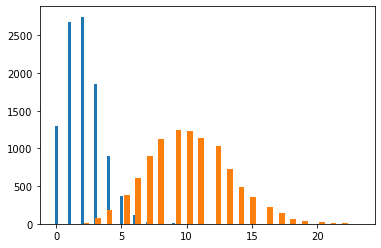

In [13]:
import numpy as np
import matplotlib.pyplot as plt

lambda0 = 2
lambda1 = 10
nbSamples = 10000

signalReceivedh0 = np.random.poisson(lambda0, nbSamples)
signalReceivedh1 = np.random.poisson(lambda1, nbSamples)

plt.hist(signalReceivedh0, 50, align="left")
plt.hist(signalReceivedh1, 50, align="right")

En un canal AWGN se supone que el ruido es gaussiano, pero no necesariamente tiene que ser guassiana la senial transmitida, por lo que tomara una senial con una distribucion de Poisson

(array([7.080e+02, 0.000e+00, 1.370e+03, 0.000e+00, 1.341e+03, 0.000e+00,
        9.590e+02, 0.000e+00, 5.580e+02, 0.000e+00, 3.750e+02, 0.000e+00,
        3.910e+02, 0.000e+00, 4.790e+02, 0.000e+00, 5.650e+02, 0.000e+00,
        5.780e+02, 0.000e+00, 6.690e+02, 0.000e+00, 5.370e+02, 0.000e+00,
        4.740e+02, 0.000e+00, 3.080e+02, 0.000e+00, 2.410e+02, 0.000e+00,
        1.630e+02, 0.000e+00, 1.260e+02, 0.000e+00, 7.400e+01, 0.000e+00,
        3.600e+01, 0.000e+00, 3.300e+01, 0.000e+00, 8.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
        16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
        22. , 22.5, 23. , 23.5, 24. , 24.5, 25. ]),
 <BarContainer object of 50 

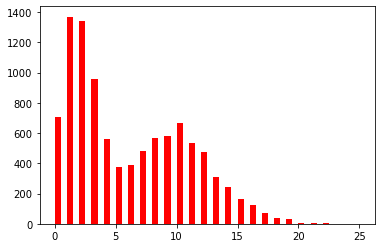

In [16]:
# Generador de hipotesis

hypothesis = np.random.randint(0, 2, nbSamples)

y = [np.random.poisson(lambda1) if hypothesis[i]>0 else np.random.poisson(lambda0) for i in range(nbSamples)]

plt.hist(y, 50, color="red")

(array([  2.,   4.,   3.,  23.,  40.,  76., 133., 232., 328., 443., 517.,
        639., 577., 584., 487., 368., 254., 155.,  87.,  53.,  24.,   9.,
          5.,   2.,   2.,   1.,   1.,   4.,   7.,  30.,  41.,  85., 148.,
        220., 337., 437., 545., 591., 617., 540., 465., 340., 232., 159.,
         78.,  51.,  15.,   4.,   2.,   3.]),
 array([-1.77579346, -1.46612222, -1.15645098, -0.84677974, -0.5371085 ,
        -0.22743726,  0.08223398,  0.39190522,  0.70157646,  1.0112477 ,
         1.32091894,  1.63059018,  1.94026142,  2.24993266,  2.5596039 ,
         2.86927514,  3.17894638,  3.48861762,  3.79828886,  4.1079601 ,
         4.41763134,  4.72730258,  5.03697382,  5.34664506,  5.6563163 ,
         5.96598754,  6.27565878,  6.58533003,  6.89500127,  7.20467251,
         7.51434375,  7.82401499,  8.13368623,  8.44335747,  8.75302871,
         9.06269995,  9.37237119,  9.68204243,  9.99171367, 10.30138491,
        10.61105615, 10.92072739, 11.23039863, 11.54006987, 11.84974111,
 

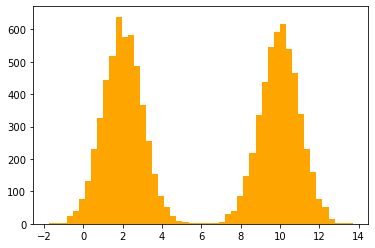

In [25]:
# Se genera el ruido

noiseHypothesis = np.ones(nbSamples, dtype=int)

noise = [np.random.normal(lambda1) if hypothesis[i]>0 else np.random.normal(lambda0) for i in range(nbSamples)]

plt.hist(noise, 50, color="orange")

(array([7.080e+02, 0.000e+00, 1.370e+03, 0.000e+00, 1.341e+03, 0.000e+00,
        9.590e+02, 0.000e+00, 5.580e+02, 0.000e+00, 3.750e+02, 0.000e+00,
        3.910e+02, 0.000e+00, 4.790e+02, 0.000e+00, 5.650e+02, 0.000e+00,
        5.780e+02, 0.000e+00, 6.690e+02, 0.000e+00, 5.370e+02, 0.000e+00,
        4.740e+02, 0.000e+00, 3.080e+02, 0.000e+00, 2.410e+02, 0.000e+00,
        1.630e+02, 0.000e+00, 1.260e+02, 0.000e+00, 7.400e+01, 0.000e+00,
        3.600e+01, 0.000e+00, 3.300e+01, 0.000e+00, 8.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
        16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
        22. , 22.5, 23. , 23.5, 24. , 24.5, 25. ]),
 <BarContainer object of 50 

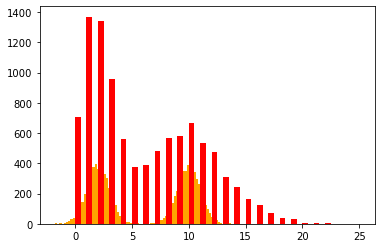

In [37]:
# Por el supuesto del canal AWGN se ruma el ruido gaussiano con la senial trasmitida

plt.hist(noise, bins=80, color="orange")
plt.hist(y, bins=50, color="red")